In [2]:
# description: reproducing PDF for the wavelet coefficients given in Appendix A
# of Damiani's paper

# Therefore, we are using Damiani's convention for the wavelet transform without the
# division by a

import numpy as np
import sys, os
import _maps as maps
import _wavelets as wt

import healpy as hp
import astropy_healpix

import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.stats import norm, uniform
from scipy.integrate import quad

from tqdm import tqdm

In [26]:
# load scale parameter
a = 2 / 5

b = np.array([0,0])
b = b[np.newaxis,:]

N_uni = 100000

uni = uniform(loc = -1, scale = 2)
x_data = uni.rvs(size = int(N_uni))
y_data = uni.rvs(size = int(N_uni))

# define 2d wavelet
wavelet_name = 'mexh'
mexh = wt._2d_wavelet(wavelet_name)

# pre-allocate wavelet coefficient map 
data = np.stack([x_data, y_data], axis = -1)
N_data, N_dim = data.shape

buf_arr_arg =  ( (data - b ) / a )

# calculate wavelet coefficients
buf_mexh_output = mexh.base_fct(buf_arr_arg)

# estimate wavelet coefficient by summing over datapoints
buf_cwt = buf_mexh_output / a

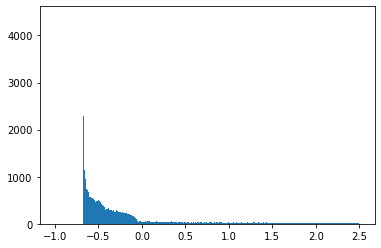

In [28]:
_, _, plot = plt.hist(buf_cwt, bins = np.linspace(-1,2.5,1000))

In [43]:
# load scale parameter
a = 2 / 5

b = np.array([0,0])
b = b[np.newaxis,:]

N_uni = 100000

r_uni = uniform(loc = 0, scale = 1)
phi_uni = uniform(loc = 0, scale = 2 * np.pi)
r_data = r_uni.rvs(size = int(N_uni))
phi_data = phi_uni.rvs(size = int(N_uni))

x_data = r_data * np.cos(phi_data)
y_data = r_data * np.sin(phi_data)

# define 2d wavelet
wavelet_name = 'mexh'
mexh = wt._2d_wavelet(wavelet_name)

# pre-allocate wavelet coefficient map 
data = np.stack([x_data, y_data], axis = -1)
N_data, N_dim = data.shape

buf_arr_arg =  ( (data - b ) / a )

# calculate wavelet coefficients
buf_mexh_output = mexh.base_fct(buf_arr_arg)

# estimate wavelet coefficient by summing over datapoints
buf_cwt = buf_mexh_output 

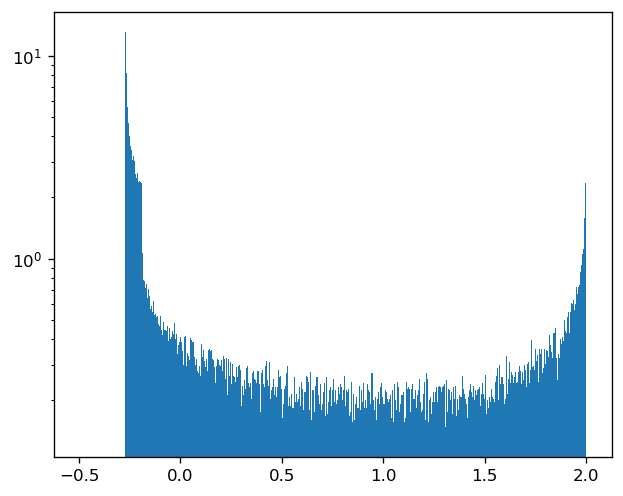

In [44]:
fig = plt.figure(figsize=(6, 6), dpi= 120)
ax = fig.add_subplot(111)
ax.set_aspect('equal')
_, _, plot = ax.hist(buf_cwt, bins = np.linspace(-0.5,2,1000), density = True)
ax.set_yscale('log')

In [75]:
# load scale parameter
a = 1

b = np.array([0,0])
b = b[np.newaxis,:]

N_uni = 1000000

r_sq_uni = uniform(loc = 0, scale = 5**2.)
phi_uni = uniform(loc = 0, scale = 2 * np.pi)
r_data = np.sqrt(r_sq_uni.rvs(size = int(N_uni)))
phi_data = phi_uni.rvs(size = int(N_uni))

x_data = r_data * np.cos(phi_data)
y_data = r_data * np.sin(phi_data)

# define 2d wavelet
wavelet_name = 'mexh'
mexh = wt._2d_wavelet(wavelet_name)

# pre-allocate wavelet coefficient map 
data = np.stack([x_data, y_data], axis = -1)
N_data, N_dim = data.shape

buf_arr_arg =  ( (data - b ) / a )

# calculate wavelet coefficients
buf_mexh_output = mexh.base_fct(buf_arr_arg)

# estimate wavelet coefficient by summing over datapoints
buf_cwt = buf_mexh_output 

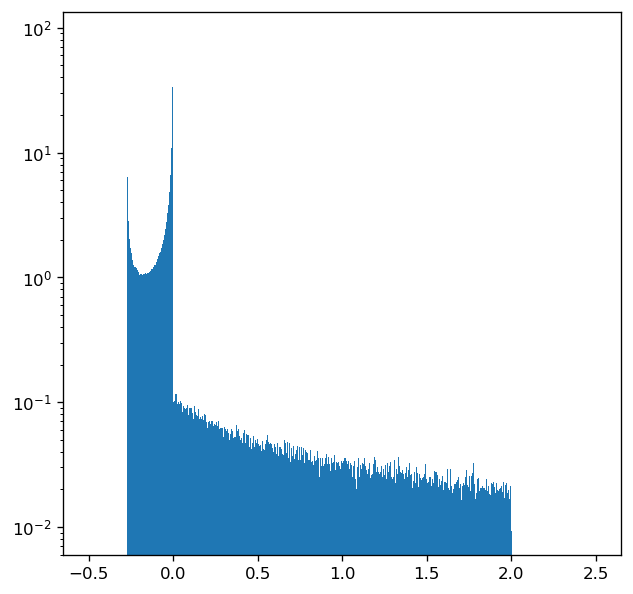

In [76]:
fig = plt.figure(figsize=(6, 6), dpi= 120)
ax = fig.add_subplot(111)
_, _, plot = ax.hist(buf_cwt, bins = np.linspace(-0.5,2.5,1000), density = True)
ax.set_yscale('log')

In [126]:
# load scale parameter
a = 1

b = np.array([0,0])
b = b[np.newaxis,np.newaxis,:]

N_uni = 1000000
N_samples = 4

r_data = np.sqrt(np.random.uniform(low = 0, high = 5**2., size = (N_uni,N_samples)))
phi_data = np.random.uniform(low = 0, high = 2 * np.pi, size = (N_uni,N_samples))

x_data = r_data * np.cos(phi_data)
y_data = r_data * np.sin(phi_data)

# define 2d wavelet
wavelet_name = 'mexh'
mexh = wt._2d_wavelet(wavelet_name)

# pre-allocate wavelet coefficient map 
data = np.stack([x_data, y_data], axis = -1)
N_data, N_samples, N_dim = data.shape
print(data.shape)

buf_arr_arg =  ( (data - b ) / a )

# calculate wavelet coefficients
buf_mexh_output = mexh.base_fct(buf_arr_arg)

# estimate wavelet coefficient by summing over datapoints
buf_cwt = np.sum(buf_mexh_output, axis = -1) 

(1000000, 4, 2)


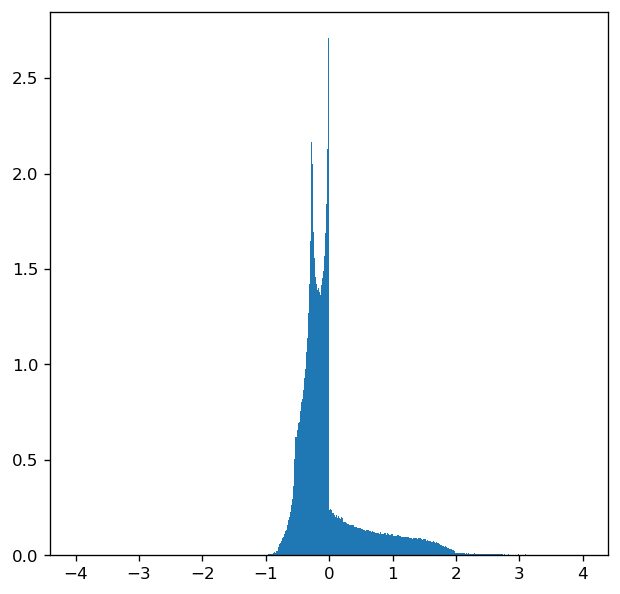

In [127]:
fig = plt.figure(figsize=(6, 6), dpi= 120)
ax = fig.add_subplot(111)
_, _, plot = ax.hist(buf_cwt, bins = np.linspace(-4,4,1000), density = True)
ax.set_yscale('linear')

In [128]:
# load scale parameter
a = 1

b = np.array([0,0])
b = b[np.newaxis,np.newaxis,:]

N_uni = 1000000
N_samples = 16

r_data = np.sqrt(np.random.uniform(low = 0, high = 5**2., size = (N_uni,N_samples)))
phi_data = np.random.uniform(low = 0, high = 2 * np.pi, size = (N_uni,N_samples))

x_data = r_data * np.cos(phi_data)
y_data = r_data * np.sin(phi_data)

# define 2d wavelet
wavelet_name = 'mexh'
mexh = wt._2d_wavelet(wavelet_name)

# pre-allocate wavelet coefficient map 
data = np.stack([x_data, y_data], axis = -1)
N_data, N_samples, N_dim = data.shape
print(data.shape)

buf_arr_arg =  ( (data - b ) / a )

# calculate wavelet coefficients
buf_mexh_output = mexh.base_fct(buf_arr_arg)

# estimate wavelet coefficient by summing over datapoints
buf_cwt = np.sum(buf_mexh_output, axis = -1) 

(1000000, 16, 2)


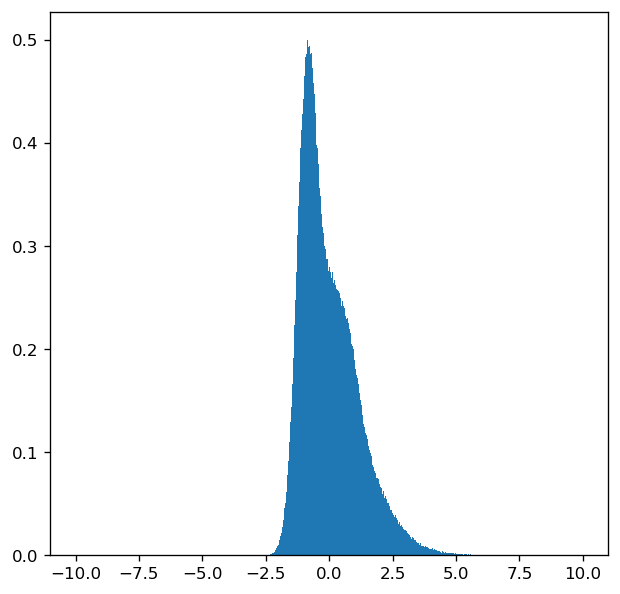

In [129]:
fig = plt.figure(figsize=(6, 6), dpi= 120)
ax = fig.add_subplot(111)
_, _, plot = ax.hist(buf_cwt, bins = np.linspace(-10,10,1000), density = True)
ax.set_yscale('linear')

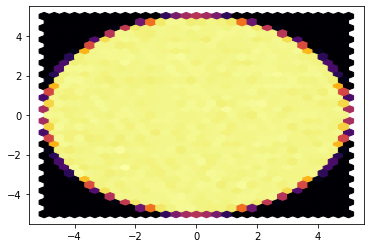

In [130]:
plt.hexbin(x_data, y_data, gridsize=30, cmap='inferno')

In [86]:
# load scale parameter
a = 1

b = np.array([0,0])
b = b[np.newaxis,np.newaxis,:]

N_uni = 100000
N_samples = 4096

r_data = np.sqrt(np.random.uniform(low = 0, high = 5**2., size = (N_uni,N_samples)))
phi_data = np.random.uniform(low = 0, high = 2 * np.pi, size = (N_uni,N_samples))

x_data = r_data * np.cos(phi_data)
y_data = r_data * np.sin(phi_data)

# define 2d wavelet
wavelet_name = 'mexh'
mexh = wt._2d_wavelet(wavelet_name)

# pre-allocate wavelet coefficient map 
data = np.stack([x_data, y_data], axis = -1)
N_data, N_samples, N_dim = data.shape
print(data.shape)

buf_arr_arg =  ( (data - b ) / a )

# calculate wavelet coefficients
buf_mexh_output = mexh.base_fct(buf_arr_arg)

# estimate wavelet coefficient by summing over datapoints
buf_cwt = np.sum(buf_mexh_output, axis = -1) 

(100000, 4096, 2)


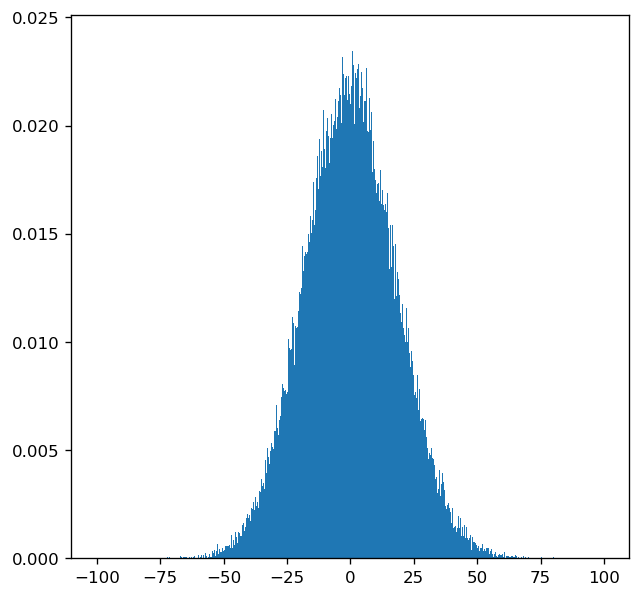

In [88]:
fig = plt.figure(figsize=(6, 6), dpi= 120)
ax = fig.add_subplot(111)
_, _, plot = ax.hist(buf_cwt, bins = np.linspace(-100,100,1000), density = True)
ax.set_yscale('linear')

In [105]:
# load scale parameter
a = 1

b = np.array([0,0])
b = b[np.newaxis,:]

N_uni = 1000000

uni = uniform(loc = -5., scale = 10.)
x_data = uni.rvs(size = int(N_uni))
y_data = uni.rvs(size = int(N_uni))

# define 2d wavelet
wavelet_name = 'mexh'
mexh = wt._2d_wavelet(wavelet_name)

# pre-allocate wavelet coefficient map 
data = np.stack([x_data, y_data], axis = -1)
N_data, N_dim = data.shape

buf_arr_arg =  ( (data - b ) / a )

# calculate wavelet coefficients
buf_mexh_output = mexh.base_fct(buf_arr_arg)

# estimate wavelet coefficient by summing over datapoints
buf_cwt = buf_mexh_output 

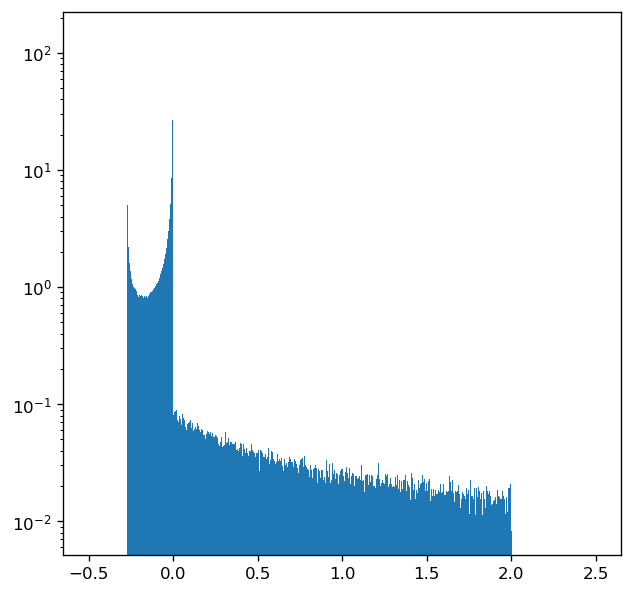

In [106]:
fig = plt.figure(figsize=(6, 6), dpi= 120)
ax = fig.add_subplot(111)
_, _, plot = ax.hist(buf_cwt, bins = np.linspace(-0.5,2.5,1000), density = True)
ax.set_yscale('log')

In [144]:
# load scale parameter
a = 1

b = np.array([0,0])
b = b[np.newaxis,:]

N_uni = 1000000

uni = uniform(loc = -5, scale = 10.)
uni_sq = uniform(loc = 0, scale = (2*5)**2.)
x_data = np.sqrt(uni_sq.rvs(size = int(N_uni))) - 5.
y_data = uni.rvs(size = int(N_uni))

# define 2d wavelet
wavelet_name = 'mexh'
mexh = wt._2d_wavelet(wavelet_name)

# pre-allocate wavelet coefficient map 
data = np.stack([x_data, y_data], axis = -1)
N_data, N_dim = data.shape

buf_arr_arg =  ( (data - b ) / a )

# calculate wavelet coefficients
buf_mexh_output = mexh.base_fct(buf_arr_arg)

# estimate wavelet coefficient by summing over datapoints
buf_cwt = buf_mexh_output 

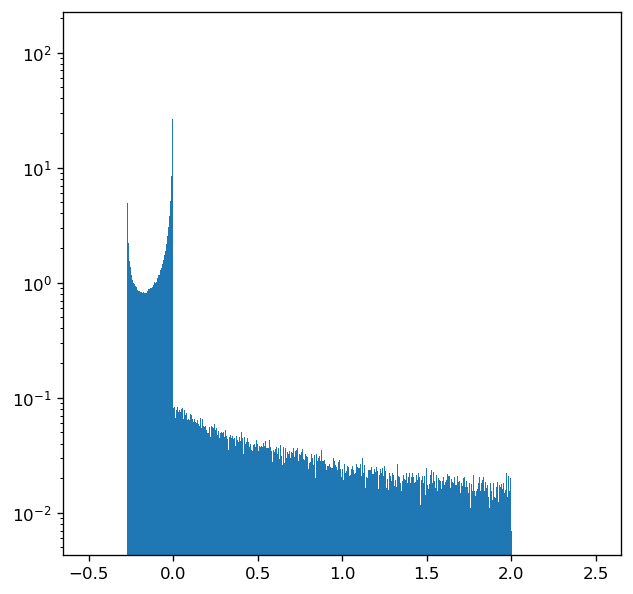

In [145]:
fig = plt.figure(figsize=(6, 6), dpi= 120)
ax = fig.add_subplot(111)
_, _, plot = ax.hist(buf_cwt, bins = np.linspace(-0.5,2.5,1000), density = True)
ax.set_yscale('log')

In [124]:
# load scale parameter
a = 1

b = np.array([0,0])
b = b[np.newaxis,np.newaxis,:]

N_uni = 1000000
N_samples = 4

x_data = -5. + np.sqrt(np.random.uniform(low = 0, high = (2*5)**2., size = (N_uni,N_samples)))
y_data = np.random.uniform(low = -5., high = 5., size = (N_uni,N_samples))

# define 2d wavelet
wavelet_name = 'mexh'
mexh = wt._2d_wavelet(wavelet_name)

# pre-allocate wavelet coefficient map 
data = np.stack([x_data, y_data], axis = -1)
N_data, N_samples, N_dim = data.shape
print(data.shape)

buf_arr_arg =  ( (data - b ) / a )

# calculate wavelet coefficients
buf_mexh_output = mexh.base_fct(buf_arr_arg)

# estimate wavelet coefficient by summing over datapoints
buf_cwt = np.sum(buf_mexh_output, axis = -1) 

(1000000, 4, 2)


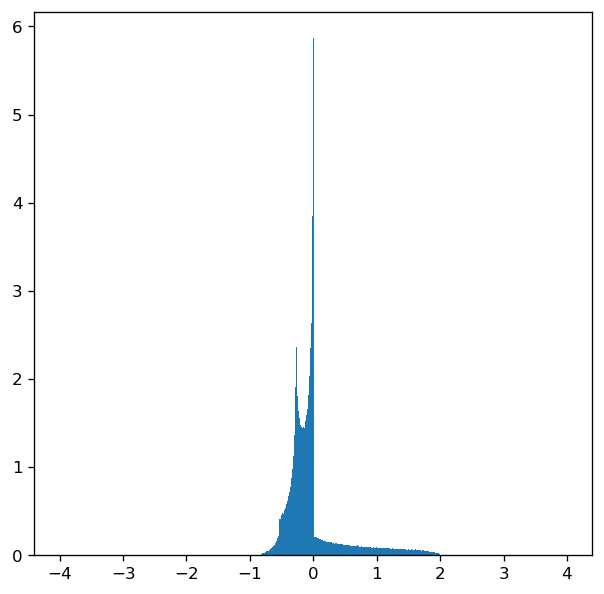

In [125]:
fig = plt.figure(figsize=(6, 6), dpi= 120)
ax = fig.add_subplot(111)
_, _, plot = ax.hist(buf_cwt, bins = np.linspace(-4,4,1000), density = True)
ax.set_yscale('linear')

In [120]:
# load scale parameter
a = 1

b = np.array([0,0])
b = b[np.newaxis,np.newaxis,:]

N_uni = 1000000
N_samples = 16

x_data = -5. + np.sqrt(np.random.uniform(low = 0, high = (2*5)**2., size = (N_uni,N_samples)))
y_data = np.random.uniform(low = -5., high = 5., size = (N_uni,N_samples))

# define 2d wavelet
wavelet_name = 'mexh'
mexh = wt._2d_wavelet(wavelet_name)

# pre-allocate wavelet coefficient map 
data = np.stack([x_data, y_data], axis = -1)
N_data, N_samples, N_dim = data.shape
print(data.shape)

buf_arr_arg =  ( (data - b ) / a )

# calculate wavelet coefficients
buf_mexh_output = mexh.base_fct(buf_arr_arg)

# estimate wavelet coefficient by summing over datapoints
buf_cwt = np.sum(buf_mexh_output, axis = -1) 

(1000000, 16, 2)


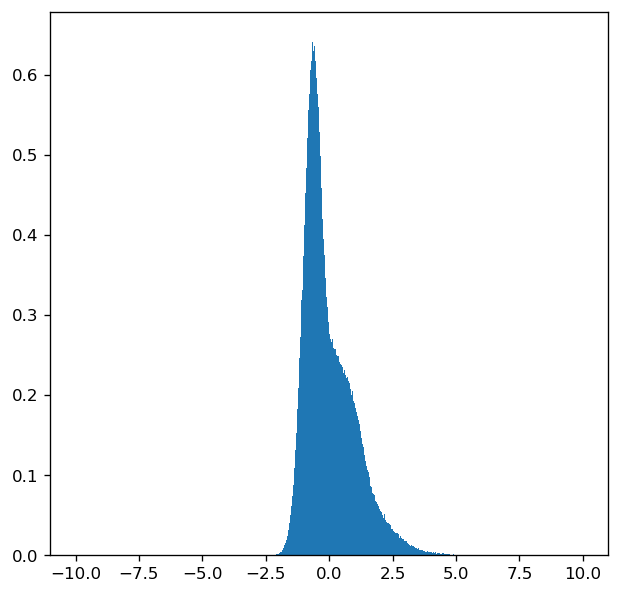

In [121]:
fig = plt.figure(figsize=(6, 6), dpi= 120)
ax = fig.add_subplot(111)
_, _, plot = ax.hist(buf_cwt, bins = np.linspace(-10,10,1000), density = True)
ax.set_yscale('linear')

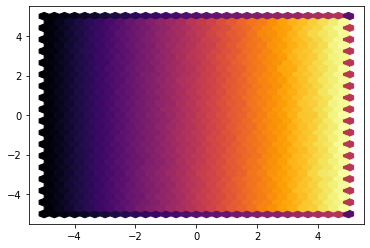

In [122]:
plt.hexbin(x_data, y_data, gridsize=30, cmap='inferno')

In [199]:
# load scale parameter
a = 1

b = np.array([0,0])
b = b[np.newaxis,:]

N_uni = 1000000

uni = uniform(loc = -5, scale = 10.)
uni_sq = uniform(loc = 0, scale = (2*5)**2.)
x_data = np.sqrt(uni_sq.rvs(size = int(N_uni))) - 5.
y_data = uni.rvs(size = int(N_uni))

# define 2d wavelet
wavelet_name = 'mexh'
mexh = wt._2d_wavelet(wavelet_name)

# pre-allocate wavelet coefficient map 
data = np.stack([x_data, y_data], axis = -1)
N_data, N_dim = data.shape

buf_arr_arg =  ( (data - b ) / a )

# calculate wavelet coefficients
buf_mexh_output = mexh.base_fct(buf_arr_arg)

# estimate wavelet coefficient by summing over datapoints
buf_cwt = buf_mexh_output 

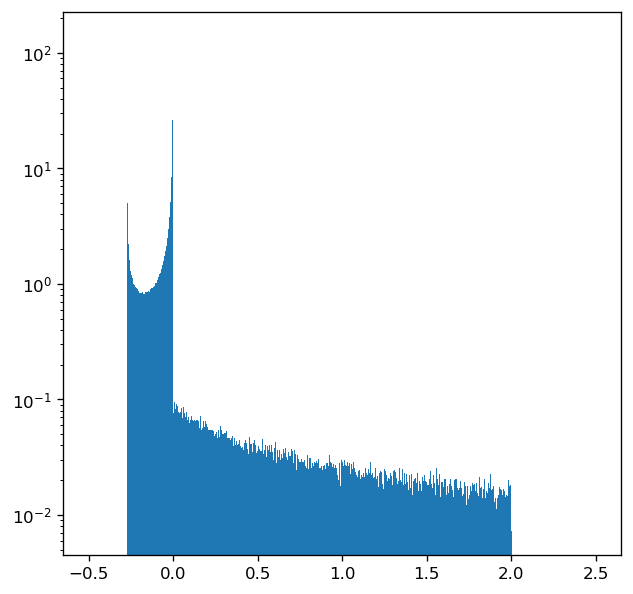

In [200]:
fig = plt.figure(figsize=(6, 6), dpi= 120)
ax = fig.add_subplot(111)
_, _, plot = ax.hist(buf_cwt, bins = np.linspace(-0.5,2.5,1000), density = True)
ax.set_yscale('log')

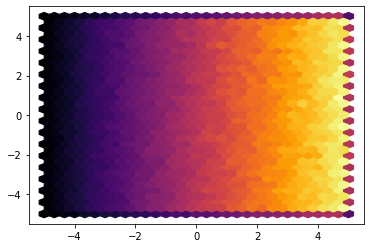

In [201]:
plt.hexbin(x_data, y_data, gridsize=30, cmap='inferno')

In [219]:
# load scale parameter
a = 1

b = np.array([0,0])
b = b[np.newaxis,np.newaxis,:]

N_uni = 1000000
N_samples = 1

x_scale = 0.000001
x_data = -0.5 * x_scale + np.sqrt(np.random.uniform(low = 0, high = (x_scale)**2., size = (N_uni,N_samples)))
y_data = np.random.uniform(low = -5., high = 5., size = (N_uni,N_samples))

# define 2d wavelet
wavelet_name = 'mexh'
mexh = wt._2d_wavelet(wavelet_name)

# pre-allocate wavelet coefficient map 
data = np.stack([x_data, y_data], axis = -1)
N_data, N_samples, N_dim = data.shape
print(data.shape)

buf_arr_arg =  ( (data - b ) / a )

# calculate wavelet coefficients
buf_mexh_output = mexh.base_fct(buf_arr_arg)

# estimate wavelet coefficient by summing over datapoints
buf_cwt = np.sum(buf_mexh_output, axis = -1) 

(1000000, 1, 2)


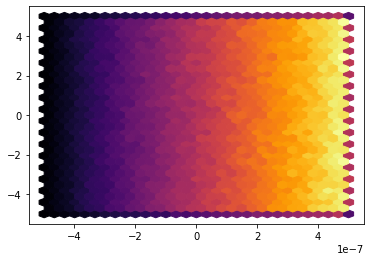

In [220]:
plt.hexbin(x_data, y_data, gridsize=30, cmap='inferno')

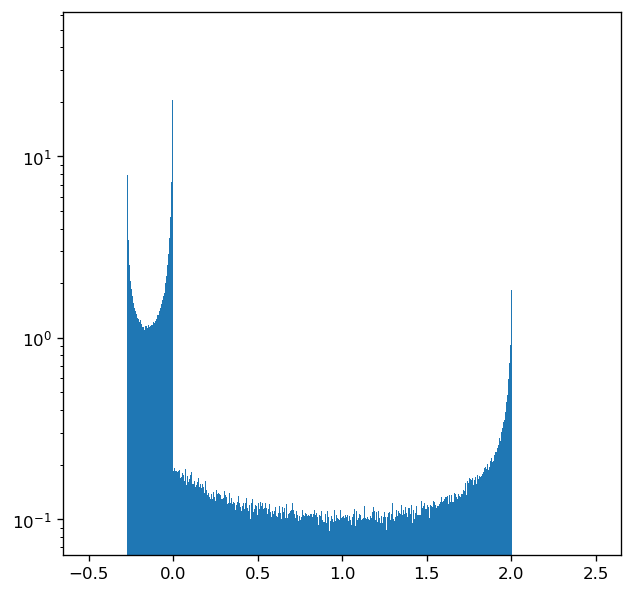

In [221]:
fig = plt.figure(figsize=(6, 6), dpi= 120)
ax = fig.add_subplot(111)
_, _, plot = ax.hist(buf_cwt, bins = np.linspace(-0.5,2.5,1000), density = True)
ax.set_yscale('log')

In [262]:
# checking general relationship between mean wavelet coefficient and 
# difference between scale parameter and slope of data

# load scale parameter
a = 1

b = np.array([0,0])
b = b[np.newaxis,np.newaxis,:]

N_uni = 10000
N_samples = 2000

x_scale = 0.000001
x_data = -0.5 * x_scale + np.sqrt(np.random.uniform(low = 0, high = (x_scale)**2., size = (N_uni,N_samples)))
y_data = np.random.uniform(low = -5., high = 5., size = (N_uni,N_samples))

# define 2d wavelet
wavelet_name = 'mexh'
mexh = wt._2d_wavelet(wavelet_name)

# pre-allocate wavelet coefficient map 
data = np.stack([x_data, y_data], axis = -1)
N_data, N_samples, N_dim = data.shape
print(data.shape)

buf_arr_arg =  ( (data - b ) / a )

# calculate wavelet coefficients
buf_mexh_output = mexh.base_fct(buf_arr_arg)

# estimate wavelet coefficient by summing over datapoints
buf_cwt = np.sum(buf_mexh_output, axis = -1) 

(10000, 2000, 2)


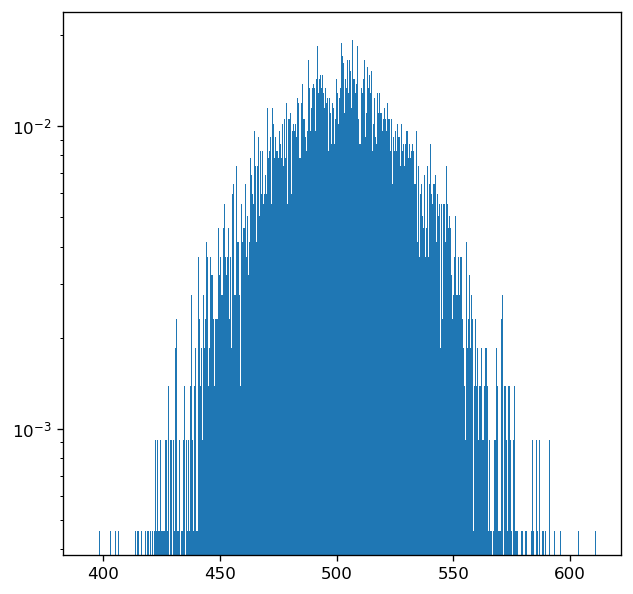

In [263]:
fig = plt.figure(figsize=(6, 6), dpi= 120)
ax = fig.add_subplot(111)
_, _, plot = ax.hist(buf_cwt, bins = 1000, density = True)
ax.set_yscale('log')